In [37]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(context='paper', style='whitegrid', color_codes=True, font_scale=1.8)
colorcycle = [(0.498, 0.788, 0.498),
              (0.745, 0.682, 0.831),
              (0.992, 0.753, 0.525),
              (0.220, 0.424, 0.690),
              (0.749, 0.357, 0.090),
              (1.000, 1.000, 0.600),
              (0.941, 0.008, 0.498),
              (0.400, 0.400, 0.400)]
sns.set_palette(colorcycle)
mpl.rcParams['figure.max_open_warning'] = 65
mpl.rcParams['figure.figsize'] = [12, 7]
mpl.rcParams['text.usetex'] = True

from speclib import misc, plotting, loaders

%matplotlib inline

In [38]:
df = pd.read_pickle('../../allan_data/RGender_.pkl')
userAlias = loaders.Useralias()
df.index = df.index.map(lambda s: userAlias[s])
q = misc.QuestionCompleter(df)
f = misc.QuestionFilterer(df)

df.head()

,function_duties__answer,function_duties__answer_type,function_duties__question,function_duties__response,function_duties__condition,narcissism_opponents__answer,narcissism_opponents__answer_type,narcissism_opponents__question,narcissism_opponents__response,narcissism_opponents__condition,...,selfesteem_proud__answer_type,selfesteem_proud__question,selfesteem_proud__response,selfesteem_proud__condition,narcissism_excellent__answer,narcissism_excellent__answer_type,narcissism_excellent__question,narcissism_excellent__response,narcissism_excellent__condition,gender
u0001,0.0,radio,At varetage dine praktiske pligter i hjemmet?,Slet ikke,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,3.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,4,False,male
u0002,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,2.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",3,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,2.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,3,False,male
u0003,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Enig,False,1.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,2,False,male
u0004,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,2.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",3,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,1.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,2,False,male
u0006,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Stærkt uenig,False,0.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,Passer slet ikke 1,False,female


In [39]:
for col, question in ((col, df[col].unique()[0]) for col in
                      sorted(df.filter(regex='alcohol.+?__question').columns)):
    print(col, question, sep='\n', end='\n--------------\n')

alcohol_binge10__question
Drukket mere end 10 genstande på en dag/aften
--------------
alcohol_binge5__question
Drukket mere end 5 genstande på en dag/aften
--------------
alcohol_debut__question
Hvor gammel var du første gang du drak mindst en genstand?
--------------
alcohol_drunk__question
Hvor mange gange er du blevet fuld af at drikke alkohol i løbet af  <u>de sidste 30 dage</u>?
--------------
alcohol_everyday__question
Drukket dig fuld på en hverdagsaften/dag, hvor du skulle i skole eller på dit fuldtidsjob dagen efter
--------------
alcohol_very_drunk__question
Drukket dig meget fuld
--------------
alcohol_volume_friday__question

--------------
alcohol_volume_monday__question

--------------
alcohol_volume_saturday__question

--------------
alcohol_volume_sunday__question

--------------
alcohol_volume_thursday__question

--------------
alcohol_volume_tuesday__question

--------------
alcohol_volume_wednesday__question

--------------
alcohol_weekend__question
Drukket alkohol 

In [40]:
misc.questionSummary(df, 'alcohol_binge5', 5)
misc.questionSummary(df, 'alcohol_binge10', 5)
misc.questionSummary(df, 'alcohol_very_drunk', 5)
misc.questionSummary(df, 'alcohol_debut', 5)
misc.questionSummary(df, 'alcohol_drunk', 5)
misc.questionSummary(df, 'alcohol_everyday', 5)
misc.questionSummary(df, 'alcohol_weekend', 5)


,response_index,answer_index,count
0,0 gange,0.0,182
1,1 gange,1.0,189
2,2 gange,2.0,164
3,3 gange,3.0,153
4,4-5 gange,4.0,120
5,6+ gange,5.0,95


,alcohol_binge5__answer,alcohol_binge5__response
u0505,4.0,4-5 gange
u0835,2.0,2 gange
u0170,NaN,NaN
u0411,1.0,1 gange
u0554,0.0,0 gange


,response_index,answer_index,count
0,0 gange,0.0,346
1,1 gange,1.0,190
2,2 gange,2.0,151
3,3 gange,3.0,89
4,4-5 gange,4.0,74
5,6+ gange,5.0,53


,alcohol_binge10__answer,alcohol_binge10__response
u0648,0.0,0 gange
u0150,1.0,1 gange
u0105,0.0,0 gange
u0551,1.0,1 gange
u0331,0.0,0 gange


,response_index,answer_index,count
0,0 gange,0.0,307
1,1 gange,1.0,216
2,2 gange,2.0,155
3,3 gange,3.0,97
4,4-5 gange,4.0,92
5,6+ gange,5.0,36


,alcohol_very_drunk__answer,alcohol_very_drunk__response
u0200,0.0,0 gange
u0630,1.0,1 gange
u0967,0.0,0 gange
u0344,1.0,1 gange
u0465,2.0,2 gange


,response_index,answer_index,count
0,14,0.0,33
1,15,1.0,903


,alcohol_debut__answer,alcohol_debut__response
u0240,1.0,14
u0101,1.0,16
u0153,1.0,15
u0857,1.0,15
u0932,1.0,16


,response_index,answer_index,count
0,0 gange,0.0,135
1,1 gange,1.0,124
2,2 gange,2.0,153
3,3 gange,3.0,120
4,4-5 gange,4.0,187
5,6-9 gange,5.0,136
6,10+ gange,6.0,48


,alcohol_drunk__answer,alcohol_drunk__response
u0611,3.0,3 gange
u0879,5.0,6-9 gange
u0532,5.0,6-9 gange
u1052,6.0,10+ gange
u0497,2.0,2 gange


,response_index,answer_index,count
0,0 gange,0.0,759
1,1 gange,1.0,99
2,2 gange,2.0,25
3,3 gange,3.0,11
4,4-5 gange,4.0,3
5,6+ gange,5.0,6


,alcohol_everyday__answer,alcohol_everyday__response
u0440,0.0,0 gange
u0888,0.0,0 gange
u0081,0.0,0 gange
u0510,0.0,0 gange
u0658,0.0,0 gange


,response_index,answer_index,count
0,0 gange,0.0,113
1,1 gange,1.0,158
2,2 gange,2.0,199
3,3 gange,3.0,173
4,4-5 gange,4.0,184
5,6+ gange,5.0,76


,alcohol_weekend__answer,alcohol_weekend__response
u0048,4.0,4-5 gange
u0709,3.0,3 gange
u0934,3.0,3 gange
u0940,2.0,2 gange
u0797,4.0,4-5 gange


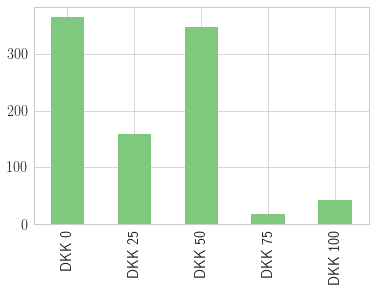

In [41]:
df.give_money__response.value_counts().loc[['DKK %d'%i for i in range(0, 101, 25)]].plot.bar(color=colorcycle[0]) 

In [42]:
misc.questionSummary(df, q.homophily_popularity_dtu)

,response_index,answer_index,count
0,Blandt de allermest populære,0.0,37
1,I den mere populære halvdel,1.0,316
2,Omtrent som gennemsnittet,2.0,543
3,I den mindre populære halvdel,3.0,38
4,Blandt de allermindst populære,4.0,2


In [43]:
misc.questionSummary(df, q.homophily_popularity) 

,response_index,answer_index,count
0,Blandt de allermest populære,0.0,93
1,I den mere populære halvdel,1.0,324
2,Omtrent som gennemsnittet,2.0,417
3,I den mindre populære halvdel,3.0,89
4,Blandt de allermindst populære,4.0,10
5,Selvstuderende/havde ingen klasse,5.0,3


In [44]:
misc.questionSummary(df, q.homophily_socialize)

,response_index,answer_index,count
0,meget vigtig for mig,0.0,445
1,vigtig for mig,1.0,423
2,ikke så vigtig for mig,2.0,57
3,er ligegyldig,3.0,7
4,ved ikke,4.0,4


In [45]:
misc.questionSummary(df, q.live_alone)

,response_index,answer_index,count
0,Ja,0.0,374
1,Nej,1.0,562


Print `locus_of_control` questions

In [46]:
tmp = lambda st: int(re.search(r'(\d+)', st).groups()[0])
idx = sorted(df.filter(regex=r'locus_of_control.+__response').columns, key=tmp)
for col in idx:
    display(df[col].value_counts())

Mange af de ulykkelige ting der sker i folks liv er delvist fordi de er uheldige    489
Folks ulykke er et resultat af de fejl de laver                                     444
Name: locus_of_control_1__response, dtype: int64

Der vil altid være krige uanset hvor meget folk prøver at forebygge det                                   775
En af de primære årsager til at vi har krige er at folk ikke er tilstrækkeligt interesserede i politik    158
Name: locus_of_control_2__response, dtype: int64

Desværre bliver et individs værdi ofte overset uanset hvor meget  han eller hun prøver    491
I det lange løb får folk den respekt de fortjener i denne verden                          442
Name: locus_of_control_3__response, dtype: int64

Forestillingen om at lærere er unfair i forhold til studerende er nonsens                           571
De fleste studerende forstår ikke i hvor høj grad deres karakterer er påvirket af tilfældigheder    362
Name: locus_of_control_4__response, dtype: int64

Dygtige mennesker, der ikke bliver ledere har ikke udnyttet deres muligheder    585
Man kan ikke blive en effektiv leder uden ”held i sprøjten\                     348
Name: locus_of_control_5__response, dtype: int64

Nogle mennesker kan bare ikke lide en uansat hvad man gør                                         609
Folk der ikke kan få andre til at lide dem forstår ikke hvordan man finder ud af det med andre    324
Name: locus_of_control_6__response, dtype: int64

At overlade ting til skæbnen har aldrig fungeret ligeså godt for mig som at tage en beslutning om at gøre noget    590
Jeg oplever ofte at tingene går deres egen gang                                                                    343
Name: locus_of_control_7__response, dtype: int64

Når der er tale om en velforberedt studerende kan man sjældent, om nogensinde, tale om en unfair eksamen    817
Ofte er eksamensspørgsmål så langt fra pensum, at forberedelse reelt ikke giver mening                      116
Name: locus_of_control_8__response, dtype: int64

Det at få succes er et spørgsmål om hårdt arbejde. Held har intet, eller kun meget lidt at gøre med det    615
At få et godt job handler mest om at være på det rigtige sted på det rigtige tidspunkt                     318
Name: locus_of_control_9__response, dtype: int64

Den gennemsnitlige borger kan have indflydelse på politiske beslutninger                                    558
Verden køres af nogle få mennesker med magt, og der er ikke meget almindelige mennesker kan gøre ved det    375
Name: locus_of_control_10__response, dtype: int64

Når jeg laver planer, er jeg næsten sikker på, at jeg kan få dem til at fungere                                                 620
Det er ikke altid klogt at planlægge for langt ud i fremtiden, da mange ting alligevel ender med at blive afgjort tilfældigt    313
Name: locus_of_control_11__response, dtype: int64

Jeg får hvad jeg vil have. Det har intet, eller kun meget lidt, med held at gøre    734
Tit kan man ligeså godt slå plat eller krone, når man skal tage en beslutning       199
Name: locus_of_control_12__response, dtype: int64

Hvad der sker for mig, skyldes det jeg selv gør                                      775
Nogen gange føler jeg, at jeg ikke har nok kontrol over den retning mit liv tager    158
Name: locus_of_control_13__response, dtype: int64

In [47]:
misc.questionSummary(df, q.narcissism_looser)

,response_index,answer_index,count
0,Passer slet ikke 1,0.0,616
1,2,1.0,193
2,3,2.0,73
3,4,3.0,30
4,5,4.0,10
5,6 Passer fuldstændigt,5.0,11


In [48]:
idx = df.filter(regex='smoke.+__question').columns.str.replace('__question', '')
print(idx)
for col in idx:
    misc.questionSummary(df, col)

Index(['smoke_daily', 'smoke_freq', 'smoke_volume_cerut', 'smoke_volume_cigar',
       'smoke_volume_pibe', 'smoke_first_cigarette', 'smoke_volume_cigarette'],
      dtype='object')


,response_index,answer_index,count
0,12 år,3.0,2
1,13 år,4.0,3
2,14 år,5.0,5
3,15 år,6.0,9
4,16 eller mere,7.0,44


,response_index,answer_index,count
0,"Ja, dagligt",0.0,63
1,"Ja, men ikke dagligt",1.0,98
2,"Nej, men jeg har røget tidligere",2.0,121
3,"Nej, jeg har aldrig røget",3.0,654


,response_index,answer_index,count
0,0.0,0.0,63


,response_index,answer_index,count
0,0.0,0.0,63


,response_index,answer_index,count
0,0.0,0.0,63


,response_index,answer_index,count
0,9 år eller yngre,0.0,6
1,10 år,1.0,4
2,11 år,2.0,4
3,12 år,3.0,14
4,13 år,4.0,27
5,14 år,5.0,65
6,15 år,6.0,60
7,16 eller mere,7.0,104


,response_index,answer_index,count
0,0.0,0.0,1
1,2.0,2.0,2
2,3.0,3.0,3
3,5.0,5.0,11
4,6.0,6.0,3
5,7.0,7.0,2
6,8.0,8.0,4
7,9.0,9.0,1
8,10.0,10.0,13
9,12.0,12.0,1


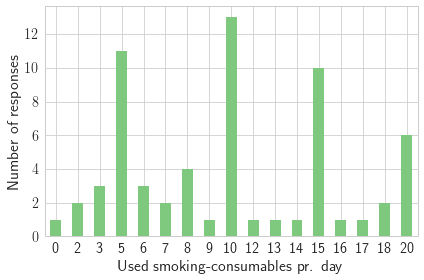

In [60]:
fig, ax = plt.subplots()
ser = df.filter(regex=r'smoke_volume.+__answer$').sum(axis=1, min_count=1).dropna().astype(int)
ser.value_counts().sort_index().plot.bar(color=colorcycle[0], ax=ax, rot=0) 
ax.set_xlabel("Used smoking-consumables pr. day")
ax.set_ylabel("Number of responses")
fig.tight_layout()
fig.savefig('figs/daily_smokers.pdf')  

In [14]:
df.head() 

,function_duties__answer,function_duties__answer_type,function_duties__question,function_duties__response,function_duties__condition,narcissism_opponents__answer,narcissism_opponents__answer_type,narcissism_opponents__question,narcissism_opponents__response,narcissism_opponents__condition,...,selfesteem_proud__answer_type,selfesteem_proud__question,selfesteem_proud__response,selfesteem_proud__condition,narcissism_excellent__answer,narcissism_excellent__answer_type,narcissism_excellent__question,narcissism_excellent__response,narcissism_excellent__condition,gender
u0001,0.0,radio,At varetage dine praktiske pligter i hjemmet?,Slet ikke,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,3.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,4,False,male
u0002,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,2.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",3,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,2.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,3,False,male
u0003,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Enig,False,1.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,2,False,male
u0004,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,2.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",3,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Uenig,False,1.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,2,False,male
u0006,1.0,radio,At varetage dine praktiske pligter i hjemmet?,Lidt,False,1.0,radio,"Jeg nyder for mig selv, når mine modstandere m...",2,False,...,radio,Jeg føler at jeg ikke har meget at være stolt af,Stærkt uenig,False,0.0,radio,Jeg formår at være midtpunkt for opmærksomhed ...,Passer slet ikke 1,False,female


In [15]:
alcohol_volume_alldays = df.filter(regex='alcohol_volume_.+_answer$')
alcohol_volume_alldays = alcohol_volume_alldays.rename(columns=lambda s: s.replace('alcohol_volume_', '').replace('__answer', '').title())
alcohol_volume_alldays = alcohol_volume_alldays[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
alcohol_volume_weekdays = alcohol_volume_alldays.drop(['Saturday', 'Friday'], axis=1) 

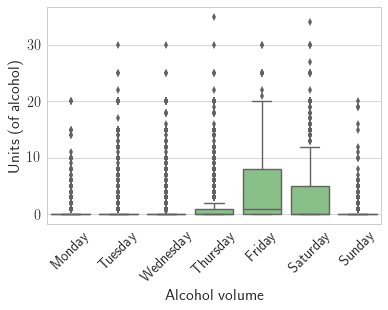

In [16]:
fig, ax = plt.subplots() 
sns.boxplot(data=alcohol_volume_alldays, color=colorcycle[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45); 
ax.set_xlabel("Alcohol volume")
ax.set_ylabel("Units (of alcohol)")
fig.savefig('figs/alcohol_volume.pdf')

In [17]:
user_alcohol_weekdays = alcohol_volume_weekdays.sum(axis=1) 
user_alcohol_weekend = alcohol_volume_alldays.drop(alcohol_volume_weekdays.columns, axis=1)

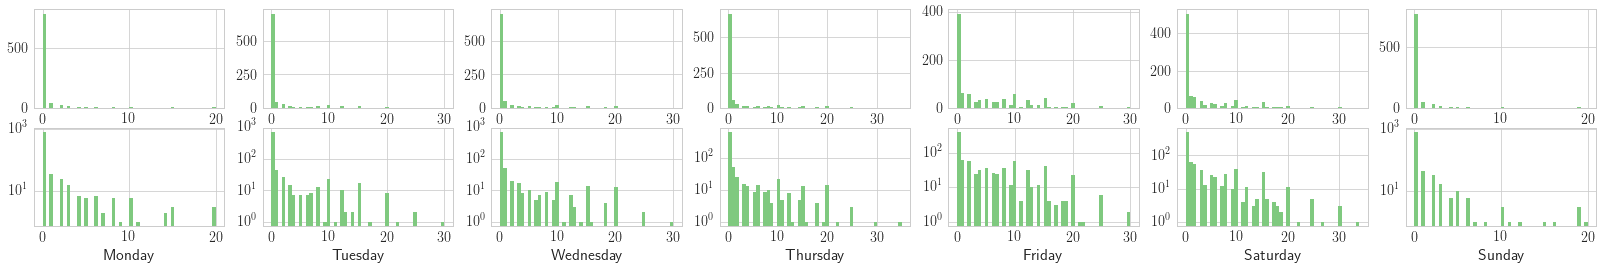

In [18]:
fig, (axr1, axr2) = plt.subplots(2, 7, figsize=(4*7, 4))
for ax, day in zip(axr1, alcohol_volume_alldays.columns):
    alcohol_volume_alldays[day].plot.hist(50, ax=ax) 
    ax.set_ylabel('')
for ax, day in zip(axr2, alcohol_volume_alldays.columns):
    ax.set_yscale('log')
    alcohol_volume_alldays[day].plot.hist(50, ax=ax) 
    ax.set_ylabel('')
    ax.set_xlabel(day)

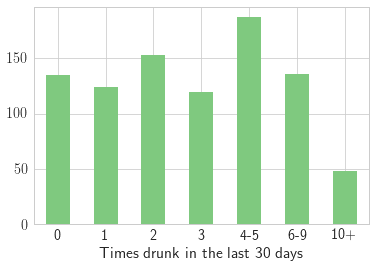

In [19]:
ax = misc.questionResponse(df, q.alcohol_drunk).plot.bar(color=colorcycle[0]) 
# ax.set_title("How many times were you drung in the last 30 days?") 
ax.set_xticklabels([el.get_text().replace(' gange', '') for el in ax.get_xticklabels()], rotation=0); 
ax.set_xlabel("Times drunk in the last 30 days") 
plt.gcf().savefig('figs/how_many_times_drunk_last_30_days.pdf')

## Bør man kode det som 0, 1, 2, 3, 4 eller som 0, 1, 2, 3, 4.5, 6.5?

In [20]:
for el in f.alcohol_everyday.iloc[0, :]:
    print(el)

df.alcohol_everyday__answer.value_counts() 

0.0
radio
Drukket dig fuld på en hverdagsaften/dag, hvor du skulle i skole eller på dit fuldtidsjob dagen efter
0 gange
alcohol_debut != 'Jeg har aldrig drukket alkohol'


0.0    759
1.0     99
2.0     25
3.0     11
5.0      6
4.0      3
Name: alcohol_everyday__answer, dtype: int64

In [21]:
alcohol_everyday = f.alcohol_everyday
alcohol_everyday.alcohol_everyday__response.value_counts().sort_index()  

0 gange      759
1 gange       99
2 gange       25
3 gange       11
4-5 gange      3
6+ gange       6
Name: alcohol_everyday__response, dtype: int64

In [22]:
questions = pd.Series(pd.Series(df.columns[:-1]).str.extract(r'(.+?)__\w+', expand=False).unique()).sort_values() 

In [23]:
for q in questions:
    if q.startswith('m'):
        print(q)

mdi_concentration
mdi_confidence
mdi_depressed
mdi_energy
mdi_guilty
mdi_high_appetite
mdi_interest
mdi_life
mdi_low_appetite
mdi_quiet
mdi_restless
mdi_sleep
medicine_concentration
medicine_depressed
medicine_headache
medicine_nervous
medicine_pain
medicine_physical
medicine_sleep


In [24]:
pd.value_counts([el[0] for el in df.columns.str.split('_', n=1, expand=False)]) // 5

bfi                  43
loneliness           19
narcissism           18
symptoms             14
alcohol              14
locus                13
mdi                  12
homophily            11
panas                10
selfesteem           10
stress               10
function              8
medicine              7
smoke                 7
physical              6
demands               6
talk                  6
sleep                 6
help                  6
conflicts             6
worries               6
contact               6
electronic            6
satisfaction          5
drugs                 5
self                  5
ambition              3
politic               2
know                  2
give                  1
online                1
trust                 1
weight                1
bf                    1
involuntary           1
live                  1
height                1
selfrated             1
selfreported          1
birthyear             1
religion              1
lonelinessfriend

In [25]:
_.sum() 

286